In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn import metrics  
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv(r"C:\Users\drash\Documents\Drashti\Quantitative Research\LSE CFM\Credit Risk Neural Networks\Customer Loan Data.csv")

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
data.shape

(10000, 8)

In [5]:
data.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [6]:
data.tail()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0
9999,5533570,1,1917.652480,3050.248203,30611.62821,6,757,0


In [7]:
data.describe()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.974577e+06,1.461200,4159.677034,8718.916797,70039.901401,4.552800,637.557700,0.185100
std,2.293890e+06,1.743846,1421.399078,6627.164762,20072.214143,1.566862,60.657906,0.388398
min,1.000324e+06,0.000000,46.783973,31.652732,1000.000000,0.000000,408.000000,0.000000
25%,2.977661e+06,0.000000,3154.235371,4199.836020,56539.867903,3.000000,597.000000,0.000000
50%,4.989502e+06,1.000000,4052.377228,6732.407217,70085.826330,5.000000,638.000000,0.000000
75%,6.967210e+06,2.000000,5052.898103,11272.263740,83429.166133,6.000000,679.000000,0.000000
max,8.999789e+06,5.000000,10750.677810,43688.784100,148412.180500,10.000000,850.000000,1.000000


In [8]:
data.isnull().sum()

customer_id                 0
credit_lines_outstanding    0
loan_amt_outstanding        0
total_debt_outstanding      0
income                      0
years_employed              0
fico_score                  0
default                     0
dtype: int64

In [9]:
data.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool>

Text(0.5, 1.0, 'Number of Default Customers\n (Default = 1, Not Default = 0)')

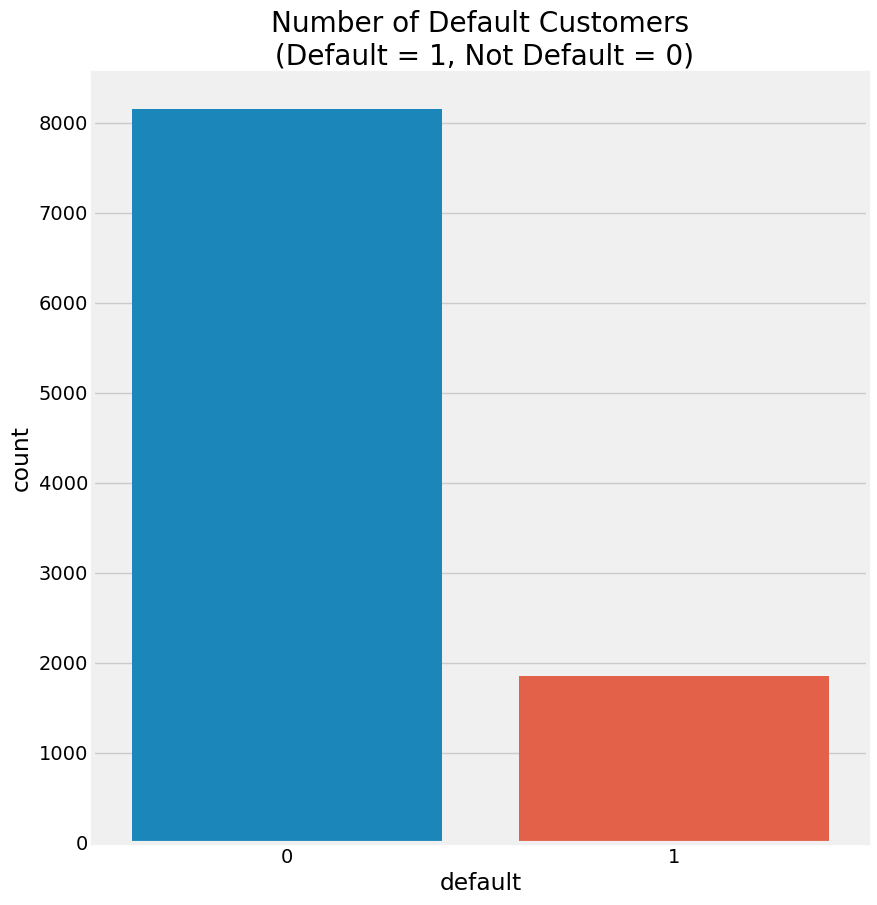

In [10]:
plt.figure(figsize=(10,10))
plt.style.use('fivethirtyeight')
sns.countplot(x='default', data=data)
plt.title('Number of Default Customers\n (Default = 1, Not Default = 0)')

In [11]:
#violin plot analysis

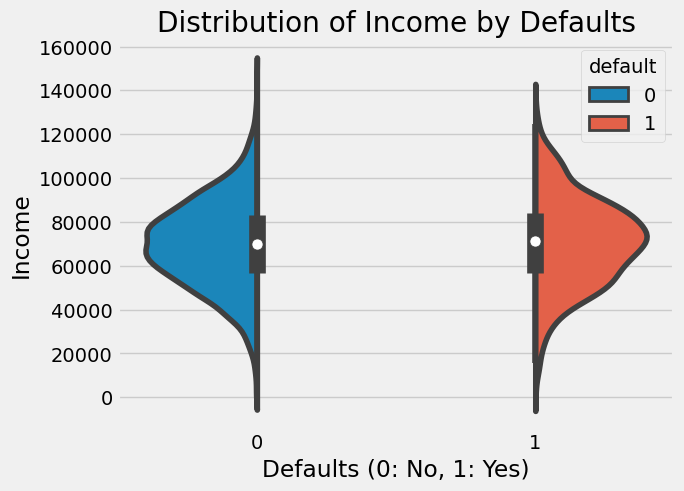

In [12]:
sns.violinplot(x='default', y='income', data=data, hue='default', split=True)
plt.xlabel('Defaults (0: No, 1: Yes)')
plt.ylabel('Income')
plt.title('Distribution of Income by Defaults')
plt.show()

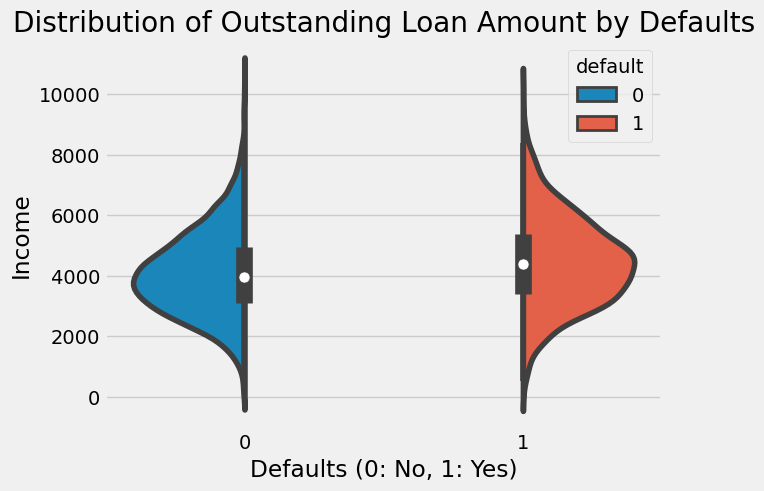

In [13]:
sns.violinplot(x='default', y='loan_amt_outstanding', data=data, hue='default', split=True)
plt.xlabel('Defaults (0: No, 1: Yes)')
plt.ylabel('Income')
plt.title('Distribution of Outstanding Loan Amount by Defaults')
plt.show()

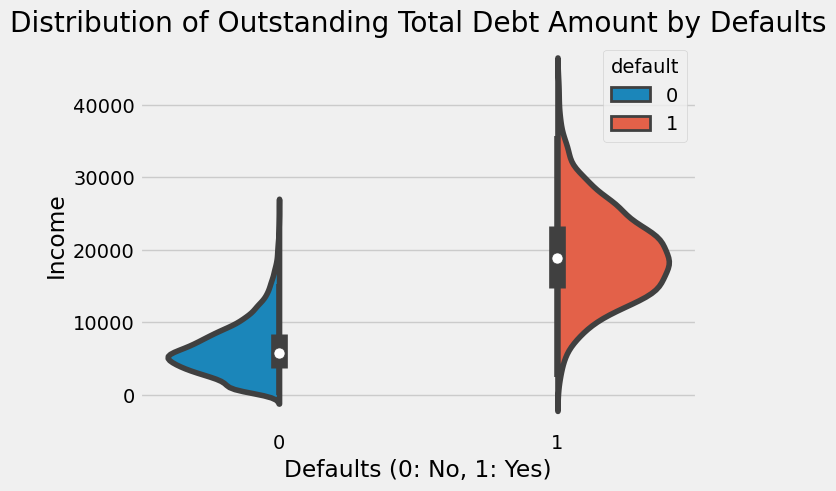

In [14]:
sns.violinplot(x='default', y='total_debt_outstanding', data=data, hue='default', split=True)
plt.xlabel('Defaults (0: No, 1: Yes)')
plt.ylabel('Income')
plt.title('Distribution of Outstanding Total Debt Amount by Defaults')
plt.show()

<Axes: >

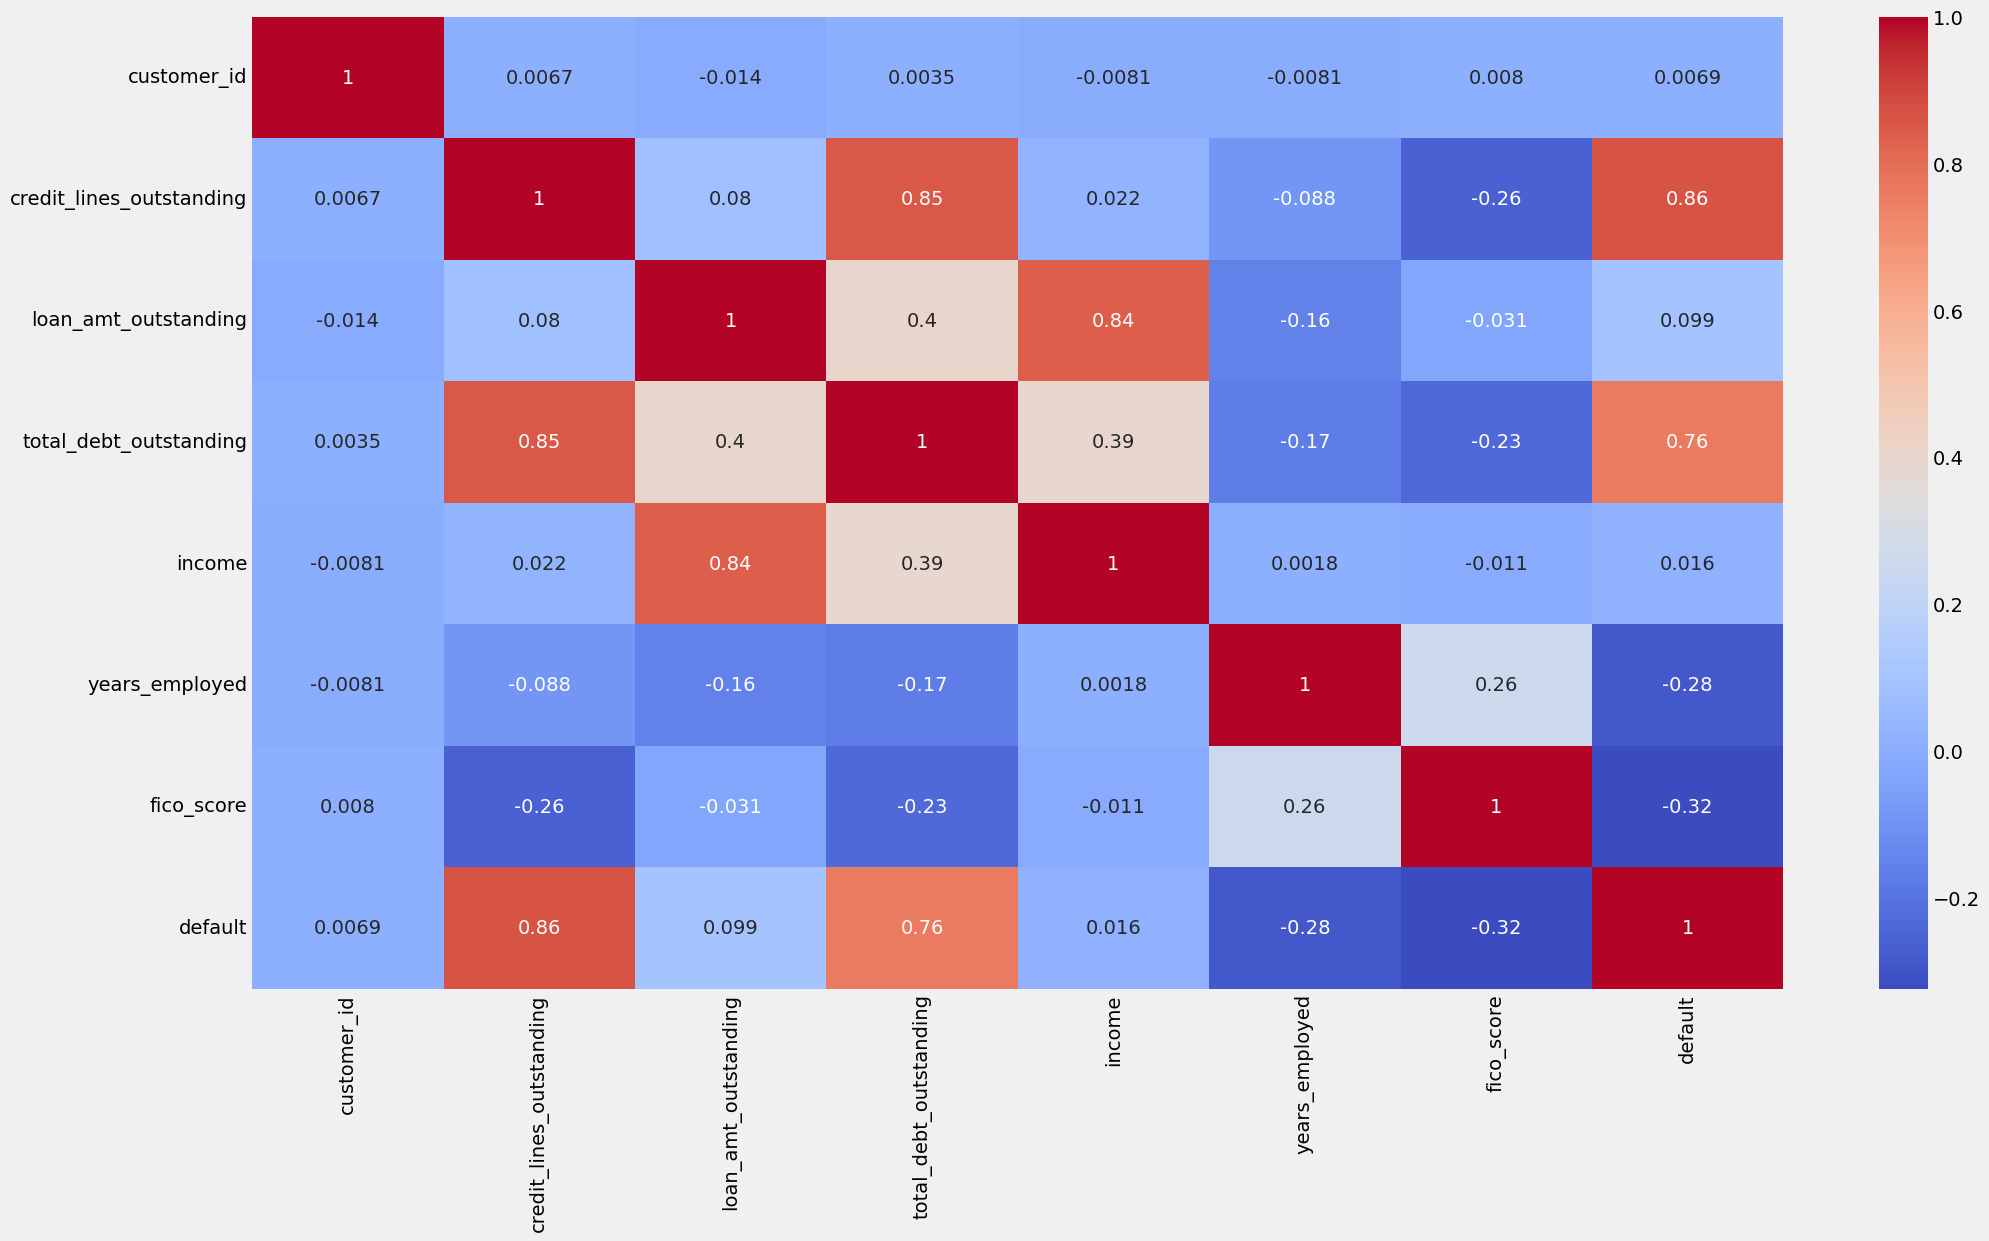

In [15]:
# Finding the correlation between different attribute
plt.figure(figsize=(22,12))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")

In [16]:
#quartile analysis

In [17]:
data['income_quartile']=pd.qcut(data['income'], q=4, labels=['IQ1', 'IQ2', 'IQ3', 'IQ4'])      

In [18]:
defaults_by_quartile=data.groupby('income_quartile')['default'].sum().reset_index()

In [19]:
defaults_by_quartile

,income_quartile,default
0,IQ1,463
1,IQ2,424
2,IQ3,485
3,IQ4,479


In [20]:
defaults_by_CLO=data.groupby('credit_lines_outstanding')['default'].sum().reset_index()

In [21]:
defaults_by_CLO

,credit_lines_outstanding,default
0,0,0
1,1,0
2,2,7
3,3,137
4,4,412
5,5,1295


In [22]:
data['LAO_quartile'] = pd.qcut(data['loan_amt_outstanding'], q=4, labels=['LQ1', 'LQ2', 'LQ3', 'LQ4'])


In [23]:
defaults_by_LAO_quartile=data.groupby('LAO_quartile')['default'].sum().reset_index()

In [24]:
defaults_by_LAO_quartile

,LAO_quartile,default
0,LQ1,357
1,LQ2,409
2,LQ3,478
3,LQ4,607


In [25]:
data['TDO_quartile']=pd.qcut(data['total_debt_outstanding'], q=4, labels=['TQ1', 'TQ2', 'TQ3', 'TQ4'])      

In [26]:
defaults_by_TDO_quartile=data.groupby('TDO_quartile')['default'].sum().reset_index()

In [27]:
defaults_by_TDO_quartile

,TDO_quartile,default
0,TQ1,9
1,TQ2,17
2,TQ3,139
3,TQ4,1686


In [28]:
data['F_quartile']=pd.qcut(data['fico_score'], q=4, labels=['FQ1', 'FQ2', 'FQ3', 'FQ4'])      

In [29]:
defaults_by_FICO_quartile=data.groupby('F_quartile')['default'].sum().reset_index()

In [30]:
defaults_by_FICO_quartile

,F_quartile,default
0,FQ1,935
1,FQ2,480
2,FQ3,286
3,FQ4,150


In [31]:
defaults_by_Years_Worked=data.groupby('years_employed')['default'].sum().reset_index()

In [32]:
defaults_by_Years_Worked

,years_employed,default
0,0,22
1,1,93
2,2,231
3,3,568
4,4,458
5,5,313
6,6,134
7,7,20
8,8,12
9,9,0


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [34]:
features = ['credit_lines_outstanding', 'debt_to_income', 'payment_to_income', 'years_employed', 'fico_score']

In [35]:
data['payment_to_income'] = data['loan_amt_outstanding'] / data['income']

In [36]:
data['debt_to_income'] = data['total_debt_outstanding'] / data['income']

In [37]:
data

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,income_quartile,LAO_quartile,TDO_quartile,F_quartile,payment_to_income,debt_to_income
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,IQ3,LQ4,TQ1,FQ2,0.066909,0.050173
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,IQ1,LQ1,TQ3,FQ1,0.073510,0.308789
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,IQ2,LQ2,TQ1,FQ2,0.051058,0.030787
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,IQ3,LQ3,TQ1,FQ2,0.064105,0.033645
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,IQ1,LQ1,TQ1,FQ2,0.057395,0.075435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0,IQ1,LQ1,TQ1,FQ4,0.071060,0.059818
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0,IQ3,LQ3,TQ2,FQ2,0.051848,0.068253
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0,IQ1,LQ1,TQ2,FQ1,0.080859,0.126021
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0,IQ1,LQ2,TQ1,FQ3,0.064578,0.020481


In [38]:
x = data.drop(['customer_id', 'default', 'income_quartile', 'LAO_quartile', 'TDO_quartile', 'F_quartile' ], axis=1)

In [39]:
y=data['default']

In [40]:
# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [41]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

# Specify the number of folds (k)
num_folds = 10  # You can adjust this based on your preferences

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store evaluation results for each fold
accuracy_list = []
conf_matrix_list = []
class_report_list = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(x_scaled, y):
    x_train, x_test = x_scaled[train_index], x_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  

In [42]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

   

C:\Users\drash\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.15)

Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9136 - loss: 0.2737 - val_accuracy: 0.9778 - val_loss: 0.0545
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - accuracy: 0.9811 - loss: 0.0430 - val_accuracy: 0.9837 - val_loss: 0.0359
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9875 - loss: 0.0274 - val_accuracy: 0.9911 - val_loss: 0.0258
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9949 - loss: 0.0179 - val_accuracy: 0.9904 - val_loss: 0.0238
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9955 - loss: 0.0150 - val_accuracy: 0.9911 - val_loss: 0.0180
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9936 - loss: 0.0144 - val_accuracy: 0.9963 - val_loss: 0.0115
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9982 - loss: 0.0073 - val_accuracy: 0.9948 - val_loss: 0.0145
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9966 - loss: 0.0081 - val_accuracy: 

In [44]:
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

    
accuracy_list.append(accuracy)
conf_matrix_list.append(conf_matrix)
class_report_list.append(class_report)

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)

print(f'F1 Score: {f1:.4f}')

# Print average results over all folds
print(f'Average Accuracy: {np.mean(accuracy_list):.4f}')
print(f'Average Confusion Matrix:\n{np.mean(conf_matrix_list, axis=0)}')
print(f'Average Classification Report:\n{np.mean(class_report_list, axis=0)}')


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
F1 Score: 0.9866
Average Accuracy: 0.9950
Average Confusion Matrix:
[[811.   3.]
 [  2. 184.]]


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U326'), dtype('<U326')) -> None

In [46]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.callbacks import EarlyStopping

# Create a Sequential model
model = Sequential()

# Add the input layer and first hidden layer with batch normalization
model.add(Dense(units=64, activation='relu', input_dim=x_train.shape[1]))
model.add(BatchNormalization())

# Add additional hidden layers with batch normalization
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(BatchNormalization())

# Add the output layer (e.g., for binary classification with sigmoid activation)
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the testing set
accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy[1]:.4f}')


Epoch 1/50


C:\Users\drash\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8518 - loss: 0.4024 - val_accuracy: 0.9906 - val_loss: 0.1080
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9758 - loss: 0.0961 - val_accuracy: 0.9878 - val_loss: 0.0391
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9837 - loss: 0.0546 - val_accuracy: 0.9867 - val_loss: 0.0336
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9864 - loss: 0.0397 - val_accuracy: 0.9894 - val_loss: 0.0255
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9887 - loss: 0.0323 - val_accuracy: 0.9811 - val_loss: 0.0495
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9884 - loss: 0.0423 - val_accuracy: 0.9889 - val_loss: 0.0296
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9891 - loss: 0.0276 - val_accuracy: 0.9922 - val_loss: 0.0200
Epoch 8/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9930 - loss: 0.0182 - val_accuracy: 0.9906 - val_

In [47]:
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
    
accuracy_list.append(accuracy)
conf_matrix_list.append(conf_matrix)
class_report_list.append(class_report)



# Print average results over all folds
print(f'Average Accuracy: {np.mean(accuracy_list):.4f}')
print(f'Average Confusion Matrix:\n{np.mean(conf_matrix_list, axis=0)}')
print(f'Average Classification Report:\n{np.mean(class_report_list, axis=0)}')


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Average Accuracy: 0.9965
Average Confusion Matrix:
[[812.5   1.5]
 [  2.  184. ]]


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U326'), dtype('<U326')) -> None

In [48]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f1)

0.9945945945945946


In [49]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

# Create a Sequential model
model = Sequential()

# Add the input layer and first hidden layer with batch normalization and L2 regularization
model.add(Dense(units=64, activation='relu', input_dim=x_train.shape[1], kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())

# Add additional hidden layers with batch normalization and L2 regularization
model.add(Dense(units=32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(units=16, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())

# Add the output layer (e.g., for binary classification with sigmoid activation)
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the testing set
accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy[1]:.4f}')


Epoch 1/50


C:\Users\drash\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7719 - loss: 1.1553 - val_accuracy: 0.9928 - val_loss: 0.6412
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9773 - loss: 0.4736 - val_accuracy: 0.9900 - val_loss: 0.3020
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9864 - loss: 0.2519 - val_accuracy: 0.9772 - val_loss: 0.1975
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9866 - loss: 0.1519 - val_accuracy: 0.9806 - val_loss: 0.1271
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9890 - loss: 0.1028 - val_accuracy: 0.9911 - val_loss: 0.0759
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9949 - loss: 0.0682 - val_accuracy: 0.9883 - val_loss: 0.0660
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9906 - loss: 0.0625 - val_accuracy: 0.9939 - val_loss: 0.0421
Epoch 8/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9903 - loss: 0.0528 - val_accuracy: 0.9894 - val_

In [50]:
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
    
accuracy_list.append(accuracy)
conf_matrix_list.append(conf_matrix)
class_report_list.append(class_report)



# Print average results over all folds
print(f'Average Accuracy: {np.mean(accuracy_list):.4f}')
print(f'Average Confusion Matrix:\n{np.mean(conf_matrix_list, axis=0)}')
print(f'Average Classification Report:\n{np.mean(class_report_list, axis=0)}')


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Average Accuracy: 0.9973
Average Confusion Matrix:
[[812.66666667   1.33333333]
 [  1.33333333 184.66666667]]


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U326'), dtype('<U326')) -> None

In [51]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f1)

0.9973190348525469
